In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
# Combine the data into a single dataset
cityride = pd.merge(ride_df, city_df, on="city", how="outer")
# Display the data table for preview
cityride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

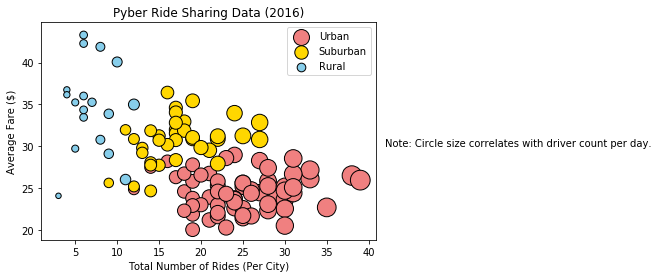

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban = cityride.loc[(cityride["type"] == "Urban")]
suburban = cityride.loc[(cityride["type"] == "Suburban")]
rural = cityride.loc[(cityride["type"] == "Rural")]

avg_fare_urban = urban.groupby(['city'])['fare'].mean()
total_rides_urban = urban.groupby(['city']).count()['ride_id']
total_drivers_urban = urban.groupby(['city'])['driver_count'].value_counts()

avg_fare_suburban = suburban.groupby(['city'])['fare'].mean()
total_rides_suburban = suburban.groupby(['city']).count()['ride_id']
total_drivers_suburban = suburban.groupby(['city'])['driver_count'].value_counts()

avg_fare_rural = rural.groupby(['city'])['fare'].mean()
total_rides_rural = rural.groupby(['city']).count()['ride_id']
total_drivers_rural = rural.groupby(['city'])['driver_count'].value_counts()

# Build the scatter plots for each city types
plt.scatter(total_rides_urban, avg_fare_urban,s=total_drivers_urban*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 1, label="Urban")

plt.scatter(total_rides_suburban, avg_fare_suburban,s=total_drivers_suburban*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 1, label="Suburban")

plt.scatter(total_rides_rural, avg_fare_rural,s=total_drivers_rural*10,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 1, label="Rural")

# Create a legend and incorporate the other graph properties
plt.legend(loc="best")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
txtstr = "Note: Circle size correlates with driver count per day. "          
# Incorporate a text label regarding circle size
plt.text(42, 30, txtstr, fontsize=10)

# Save Figure
plt.savefig("../Images/PyberRideSharing.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

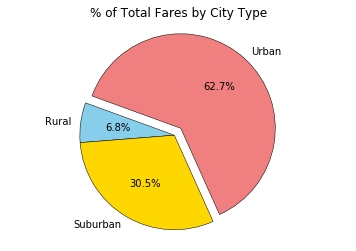

In [4]:
# Calculate Type Percents
neighborhood_type = cityride.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
fare_sum = neighborhood_type.sum()['fare']

# Build Pie Chart
labels = fare_sum.index
colors = ["skyblue","gold","lightcoral"]
explode = [0 , 0, .1]
plt.pie(fare_sum, startangle = 160, colors = colors, 
        explode = explode, labels = labels, autopct = "%1.1f%%", 
        shadow = False, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Images/TotalFaresbyCityType.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

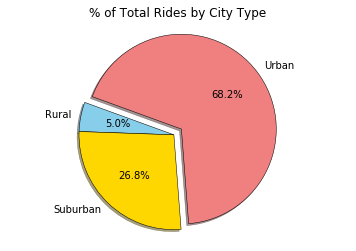

In [6]:
# Calculate Ride Percents
ride_sum = neighborhood_type.sum()['ride_id']

# Build Pie Chart
labels = ride_sum.index
colors = ["skyblue","gold","lightcoral"]
explode = [0 , 0, .1]
plt.pie(ride_sum, startangle = 160, colors = colors, 
        explode = explode, labels = labels, autopct = "%1.1f%%", 
        shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Images/TotalRidesbyCityType.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

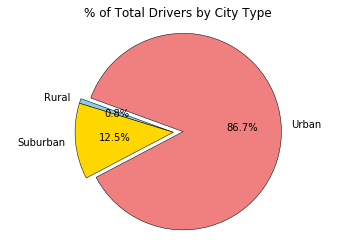

In [8]:
# Calculate Driver Percents
driver_sum = neighborhood_type.sum()['driver_count']

# Build Pie Charts
labels = driver_sum.index
colors = ["skyblue","gold","lightcoral"]
explode = [0 , 0, .1]
plt.pie(driver_sum, startangle = 160, colors = colors, 
        explode = explode, labels = labels, autopct = "%1.1f%%", 
        shadow = False, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Images/TotalDriversbyCityType.png")

In [9]:
# Show Figure
plt.show()